## Data cleaning with pandas

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/property_data.csv')

In [3]:
df.head(10)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,--,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


### Standard missing values

In [4]:
df['ST_NUM']

0    104.0
1    197.0
2      NaN
3    201.0
4    203.0
5    207.0
6      NaN
7    213.0
8    215.0
Name: ST_NUM, dtype: float64

In [5]:
df['ST_NUM'].isnull()

0    False
1    False
2     True
3    False
4    False
5    False
6     True
7    False
8    False
Name: ST_NUM, dtype: bool

### Non standard missing values

In [6]:
df['NUM_BEDROOMS']

0      3
1      3
2    NaN
3      1
4      3
5    NaN
6      2
7     --
8     na
Name: NUM_BEDROOMS, dtype: object

In [7]:
df['NUM_BEDROOMS'].isnull()

0    False
1    False
2     True
3    False
4    False
5     True
6    False
7    False
8    False
Name: NUM_BEDROOMS, dtype: bool

Beberapa data null yg dibuat secara manual tidak dikenali sebagai missing data . maka dari itu kita memasukkan data tersebut kedalam list agar dapat dikenali oleh pandas

In [8]:
missing_values = ["n/a","na","--"]

In [9]:
df =pd.read_csv("property_data.csv", na_values = missing_values)

In [10]:
df['NUM_BEDROOMS']

0    3.0
1    3.0
2    NaN
3    1.0
4    3.0
5    NaN
6    2.0
7    NaN
8    NaN
Name: NUM_BEDROOMS, dtype: float64

In [11]:
df['NUM_BEDROOMS'].isnull()

0    False
1    False
2     True
3    False
4    False
5     True
6    False
7     True
8     True
Name: NUM_BEDROOMS, dtype: bool

### Unexpected missing values

tipe data yang berbeda dari data nya, secara teknis ini juga merupakan missing values

In [12]:
df['OWN_OCCUPIED']

0      Y
1      N
2      N
3     12
4      Y
5      Y
6    NaN
7      Y
8      Y
Name: OWN_OCCUPIED, dtype: object

In [13]:
df['OWN_OCCUPIED'].isnull()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
7    False
8    False
Name: OWN_OCCUPIED, dtype: bool

Loop pada kolom OWN_OCCUPIED - ubah semua entry menjadi integer - jika entry tidak dapat diubah menjadi integer, tandai sebagai missing value -- jika tidak dapaat menjadi integer, maka kita tau kalau entry adalah string , keep going

In [14]:
cnt=0
for row in df['OWN_OCCUPIED']:
    try:
        int(row)
        df.loc[cnt, 'OWN_OCCUPIED']=np.nan
    except ValueError:
        pass
    cnt+=1

In [15]:
df.head(9)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


### Summarizing missing value

In [16]:
df.isnull().sum()

PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    2
NUM_BEDROOMS    4
NUM_BATH        1
SQ_FT           2
dtype: int64

#### Pemeriksaan data hilang
melakukan pemeriksaan cepat untuk melihat apakah kita memiliki nilai yang hilang sama sekali

In [17]:
df.isnull().values.any()

True

jumlah total missing values

In [18]:
df.isnull().sum().sum()

12

### Replacing
menghapus baris tersebut, dilain wwaktu kalian menggantinya

In [19]:
df['ST_NUM'].fillna(125, inplace=True)

Mungkin ingin melakukan imputasi berbasis lokasi/location based imputation, inilah cara kalian melakukannya

In [20]:
df.loc[2,'ST_NUM'] = 125

cara yg sangat umum untuk mengganti missing values menggunakan median

In [21]:
median = df['NUM_BEDROOMS'].median()
df['NUM_BEDROOMS'].fillna(median, inplace=True)

In [22]:
df.head(9)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,125.0,LEXINGTON,N,3.0,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,3.0,1,800.0
6,100007000.0,125.0,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,3.0,1,NaN
8,100009000.0,215.0,TREMONT,Y,3.0,2,1800.0


### Analizycing obsity in england

In [23]:
import numpy as np
import pandas as pd

In [24]:
%matplotlib inline
data = pd.ExcelFile('obes.xlsx')

In [25]:
data.sheet_names

['Chapter 7',
 '7.1',
 '7.2',
 '7.3',
 '7.4',
 '7.5',
 '7.6',
 '7.7',
 '7.8',
 '7.9',
 '7.10']

kita fokuskan pada sheet 7.2. 4 baris teratas dan 14 baris terbawah berisi info yg tidak berguna. kita hanya membutuhkan baris 5-18

In [26]:
data_age = data.parse(u'7.2', skiprows=4, skipfooter=14)


In [27]:
data_age.head()

,Unnamed: 0,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0


Baris pertama mewakili column headers. kita memiliki baris kosong di file asli, dan itu muncul sebagai NaN (bukan angka)

#### Step
rename the first header to Year and

 get rid of any empty rows

In [28]:
data_age.rename(columns={u'Unnamed: 0': u'Year'}, inplace= True)

Disini kita kasih tau pandas untuk mengganti nama kolom Unnamed:0 menjadi Year. menggunakan fungsi rename().

selanjutnya kita hapus baris kosong yg diisi dengan NaN

In [29]:
data_age.dropna(inplace=True)

In [30]:
# data_age.set_index('Year', inplace=True)
data_age.set_index('Year', inplace=True)

In [31]:
data_age.head()


,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
Year,,,,,,,,,
2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0


### Plot

<AxesSubplot:xlabel='Year'>

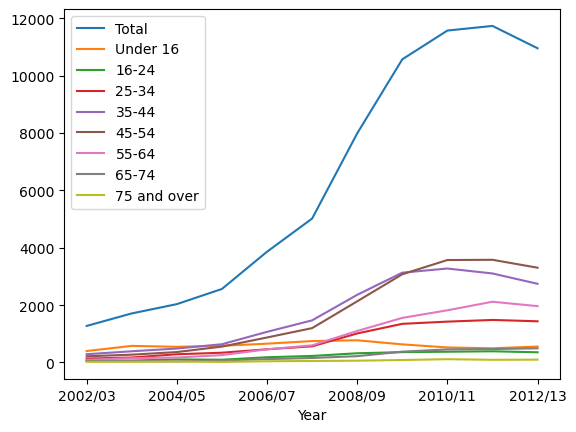

In [32]:
data_age.plot()

data asli kita berisi total yang menutupi bidang lainnya, kita perlu menyingkirkannya

In [33]:
data_age_minus_total = data_age.drop('Total', axis=1)

<AxesSubplot:xlabel='Year'>

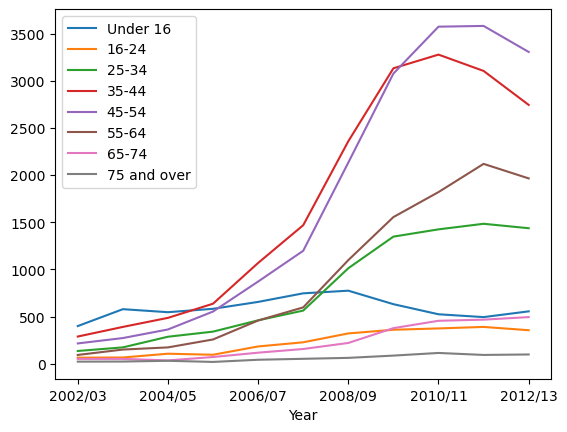

In [34]:
data_age_minus_total.plot()

Are children getting fatter?

Mari kita buat plot sebagian kecil data: anak-anak dibawah usia 16 tahun dan orang dewasa dengan rentang usia 35 - 44 tahun.

<AxesSubplot:xlabel='Year'>

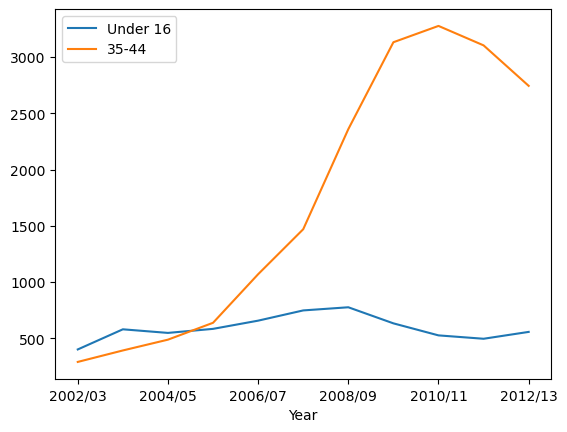

In [35]:
data_age['Under 16'].plot(label="Under 16", legend= True)
data_age['35-44'].plot(label="35-44", legend=True)

so who is getting fatter?

saat obesitas anak sedikit menurun, orang tua mereka membengkak. jadi nampaknya para orang tua lebih perlu mengkhawatirkan diri sendiri daripada anak-anaknya

### Times series

#### Basic time series manipulation
Pertama import libraries yg kita butuhkan dan gunakan untuk membuat date range

In [36]:
from datetime import datetime

In [37]:
date_rng = pd.date_range(start='1/01/2020', end='1/08/2020', freq='H')

Date range ini memiliki timestamps dengan frekuensi perjam.

In [38]:
date_rng

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00',
               ...
               '2020-01-07 15:00:00', '2020-01-07 16:00:00',
               '2020-01-07 17:00:00', '2020-01-07 18:00:00',
               '2020-01-07 19:00:00', '2020-01-07 20:00:00',
               '2020-01-07 21:00:00', '2020-01-07 22:00:00',
               '2020-01-07 23:00:00', '2020-01-08 00:00:00'],
              dtype='datetime64[ns]', length=169, freq='H')

DataFrame dengan timestamp dan lihat 15 elemen pertama

In [39]:
df = pd.DataFrame(date_rng,columns=['date'])

In [40]:
df['data'] = np.random.randint(0,100,size=(len(date_rng)))

In [41]:
df.head()

,date,data
0,2020-01-01 00:00:00,25
1,2020-01-01 01:00:00,17
2,2020-01-01 02:00:00,62
3,2020-01-01 03:00:00,94
4,2020-01-01 04:00:00,1


konversikan indeks data frame menjadi datetime index dan tampilkan elemen pertama

In [42]:
import pandas as pd

In [43]:
df['datetime'] = pd.to_datetime(df['date'])

In [44]:
df = df.set_index('datetime')

In [45]:
df.drop(['date'], axis=1,inplace=True)

In [46]:
df.head()

,data
datetime,
2020-01-01 00:00:00,25
2020-01-01 01:00:00,17
2020-01-01 02:00:00,62
2020-01-01 03:00:00,94
2020-01-01 04:00:00,1


bagaimana jika 'time' stamps dalam data kita sebenarnya berjenis string vs.numerik?

mari kita ubah date_rng menjadi list of string dan kemudian ubah string tersebut menjadi stempel waktu

In [47]:
string_date_rng = [str(x) for x in date_rng]

In [48]:
string_date_rng

['2020-01-01 00:00:00',
 '2020-01-01 01:00:00',
 '2020-01-01 02:00:00',
 '2020-01-01 03:00:00',
 '2020-01-01 04:00:00',
 '2020-01-01 05:00:00',
 '2020-01-01 06:00:00',
 '2020-01-01 07:00:00',
 '2020-01-01 08:00:00',
 '2020-01-01 09:00:00',
 '2020-01-01 10:00:00',
 '2020-01-01 11:00:00',
 '2020-01-01 12:00:00',
 '2020-01-01 13:00:00',
 '2020-01-01 14:00:00',
 '2020-01-01 15:00:00',
 '2020-01-01 16:00:00',
 '2020-01-01 17:00:00',
 '2020-01-01 18:00:00',
 '2020-01-01 19:00:00',
 '2020-01-01 20:00:00',
 '2020-01-01 21:00:00',
 '2020-01-01 22:00:00',
 '2020-01-01 23:00:00',
 '2020-01-02 00:00:00',
 '2020-01-02 01:00:00',
 '2020-01-02 02:00:00',
 '2020-01-02 03:00:00',
 '2020-01-02 04:00:00',
 '2020-01-02 05:00:00',
 '2020-01-02 06:00:00',
 '2020-01-02 07:00:00',
 '2020-01-02 08:00:00',
 '2020-01-02 09:00:00',
 '2020-01-02 10:00:00',
 '2020-01-02 11:00:00',
 '2020-01-02 12:00:00',
 '2020-01-02 13:00:00',
 '2020-01-02 14:00:00',
 '2020-01-02 15:00:00',
 '2020-01-02 16:00:00',
 '2020-01-02 17:

kita dapat mengonversi string menjadi timestamps dengan melihat formatnya, lalu melihat nilainya:

In [49]:
timestamp_date_rng = pd.to_datetime(string_date_rng,infer_datetime_format=True)

In [50]:
timestamp_date_rng

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00',
               ...
               '2020-01-07 15:00:00', '2020-01-07 16:00:00',
               '2020-01-07 17:00:00', '2020-01-07 18:00:00',
               '2020-01-07 19:00:00', '2020-01-07 20:00:00',
               '2020-01-07 21:00:00', '2020-01-07 22:00:00',
               '2020-01-07 23:00:00', '2020-01-08 00:00:00'],
              dtype='datetime64[ns]', length=169, freq=None)

buat daftar tanggal yang berubah ubah menjadi string dan mengubahnya menjadi timestamps

In [51]:
string_date_rng_2 = ['June-01-2020', 'June-02-2020', 'June-03-2020']

In [52]:
timestamp_date_rng_2 = [datetime.strptime(x, '%B-%d-%Y') for x in string_date_rng_2]

In [53]:
timestamp_date_rng_2

[datetime.datetime(2020, 6, 1, 0, 0),
 datetime.datetime(2020, 6, 2, 0, 0),
 datetime.datetime(2020, 6, 3, 0, 0)]

In [54]:
df2 = pd.DataFrame(timestamp_date_rng_2, columns=['date'])

In [55]:
df2

,date
0,2020-06-01
1,2020-06-02
2,2020-06-03


jika kita hanya ingin melihat data dimana tanggalnya adalah tanggal 2 setiap bulannya, kita bisa menggunakan indeks:

In [56]:
df[df.index.day == 2]

,data
datetime,
2020-01-02 00:00:00,54
2020-01-02 01:00:00,38
2020-01-02 02:00:00,92
2020-01-02 03:00:00,32
2020-01-02 04:00:00,51
2020-01-02 05:00:00,98
2020-01-02 06:00:00,55
2020-01-02 07:00:00,18
2020-01-02 08:00:00,98


kita juga bisa langsung memanggil tanggal yang ingin kita lihat melalui index dari data frame:

In [57]:
df['2020-01-03']

C:\Users\Acer5\AppData\Local\Temp\ipykernel_5168\186698106.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df['2020-01-03']


,data
datetime,
2020-01-03 00:00:00,38
2020-01-03 01:00:00,91
2020-01-03 02:00:00,54
2020-01-03 03:00:00,17
2020-01-03 04:00:00,70
2020-01-03 05:00:00,32
2020-01-03 06:00:00,82
2020-01-03 07:00:00,19
2020-01-03 08:00:00,50


Bagaimana dengan memilih data diantara tanggal tertentu

In [58]:
df['2020-01-03': '2020-01-06']

,data
datetime,
2020-01-03 00:00:00,38
2020-01-03 01:00:00,91
2020-01-03 02:00:00,54
2020-01-03 03:00:00,17
2020-01-03 04:00:00,70
...,...
2020-01-06 19:00:00,53
2020-01-06 20:00:00,6
2020-01-06 21:00:00,49


kita dapat mengambil min, max, average,sum dll, dari data pada frekuensi harian daripada frekuensi per jam:

In [59]:
df.resample('D').mean()

,data
datetime,
2020-01-01,48.333333
2020-01-02,55.500000
2020-01-03,50.291667
2020-01-04,47.916667
2020-01-05,44.875000
2020-01-06,52.166667
2020-01-07,57.833333
2020-01-08,35.000000


buat kolom baru di df asli kita yg menghitung rolling sum selama periode 3 window dan kemudian lihat dibagian atas data frame:

In [60]:
df['rolling_sum'] = df.rolling(3).sum()

In [61]:
df.head()

,data,rolling_sum
datetime,,
2020-01-01 00:00:00,25,NaN
2020-01-01 01:00:00,17,NaN
2020-01-01 02:00:00,62,104.0
2020-01-01 03:00:00,94,173.0
2020-01-01 04:00:00,1,157.0


pandas menghitung dengan benar dan hanya memiliki nilai yg valid ketika ada tiga periode untuk melihat kebelakang.

kita dapat melakukan forward or backfilling data saat bekerja dengan nilai data yg hilang

berikut df, tetapi dengan kolom baru yg mengambil rolling sum dan backfills data:

In [62]:
df['rolling_sum_backfilled'] = df['rolling_sum'].fillna(method='backfill')

In [63]:
df.head()

,data,rolling_sum,rolling_sum_backfilled
datetime,,,
2020-01-01 00:00:00,25,NaN,104.0
2020-01-01 01:00:00,17,NaN,104.0
2020-01-01 02:00:00,62,104.0,104.0
2020-01-01 03:00:00,94,173.0,173.0
2020-01-01 04:00:00,1,157.0,157.0


### Time series on dataset

In [64]:
opsd_daily = pd.read_csv('opsd_germany_daily.csv')

In [65]:
opsd_daily.shape

(4383, 5)

DataFrame memiliki 4383 baris, mencakup periode dari 1 januari 2006 hingga 31 desember 2017.

In [66]:
opsd_daily.head(3)

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN


In [67]:
opsd_daily.tail(3)

,Date,Consumption,Wind,Solar,Wind+Solar
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714
4382,2017-12-31,1107.11488,721.176,19.980,741.156


karna kolom date Date adalah tipe data yg benar, mari kita set sebagai indeks DataFrame

In [68]:
opsd_daily = opsd_daily.set_index('Date')
opsd_daily.head(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN


In [69]:
opsd_daily.index

Index(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04', '2006-01-05',
       '2006-01-06', '2006-01-07', '2006-01-08', '2006-01-09', '2006-01-10',
       ...
       '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-26',
       '2017-12-27', '2017-12-28', '2017-12-29', '2017-12-30', '2017-12-31'],
      dtype='object', name='Date', length=4383)

alternatif, kita dapat menggabungkan langkah-langkah diatas menjadi satu baris, menggunakan parameter index_col dan parse_dates dari fungsi read_csv(). ini merupakan jalan pintas

In [70]:
opsd_daily = pd.read_csv('opsd_germany_daily.csv', index_col=0, parse_dates=True)

In [71]:
opsd_daily.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


aspek berguna lainnya dari DatetimeIndex adalah bahwa setiap komponen tanggal / waktu tersedia sebagai atribut seperti tahun, bulan, hari, dan seterusnya. mari tambahkan beberapa kolom lagi ke opsd_daily, yg berisi tahun, bulan, dan hari kerja

In [72]:
opsd_daily['Year'] = opsd_daily.index.year
opsd_daily['Month'] = opsd_daily.index.month
opsd_daily['Weekday'] = opsd_daily.index.weekday

In [73]:
opsd_daily.head()

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,2006,1,6
2006-01-02,1380.521,NaN,NaN,NaN,2006,1,0
2006-01-03,1442.533,NaN,NaN,NaN,2006,1,1
2006-01-04,1457.217,NaN,NaN,NaN,2006,1,2
2006-01-05,1477.131,NaN,NaN,NaN,2006,1,3


kita dapat memilih data untuk satu hari menggunakan string seperti '2017-08-10'

In [74]:
opsd_daily.loc['2017-08-10']

Consumption    1351.491
Wind            100.274
Solar            71.160
Wind+Solar      171.434
Year           2017.000
Month             8.000
Weekday           3.000
Name: 2017-08-10 00:00:00, dtype: float64

kita juga dapat memilih slice dari hari, seperti '2014-01-20' : '2014-01-22'.

In [75]:
opsd_daily.loc['2014-01-20' : '2014-01-22' ]

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2014-01-20,1590.687,78.647,6.371,85.018,2014,1,0
2014-01-21,1624.806,15.643,5.835,21.478,2014,1,1
2014-01-22,1625.155,60.259,11.992,72.251,2014,1,2


### Partial-string indexing
kita dapat memilih semua tanggal / waktu yg sebagian cocok dengan string yg diberikan. misal, kita daat memilih seluruh tahun 2016 dengan opsd_daily.loc['2016'], atau seluruh bulan februari 2012 dengan opsd_daily.loc['2012-02']

In [76]:
opsd_daily.loc['2012-02']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2012-02-01,1511.866,199.607,43.502,243.109,2012,2,2
2012-02-02,1563.407,73.469,44.675,118.144,2012,2,3
2012-02-03,1563.631,36.352,46.510,82.862,2012,2,4
2012-02-04,1372.614,20.551,45.225,65.776,2012,2,5
2012-02-05,1279.432,55.522,54.572,110.094,2012,2,6
2012-02-06,1574.766,34.896,55.389,90.285,2012,2,0
2012-02-07,1615.078,100.312,19.867,120.179,2012,2,1
2012-02-08,1613.774,93.763,36.930,130.693,2012,2,2
2012-02-09,1591.532,132.219,19.042,151.261,2012,2,3


mari kita buat line plot dari time series konsumsi listrik harian di jerman, menggunakan method plit() DataFrame

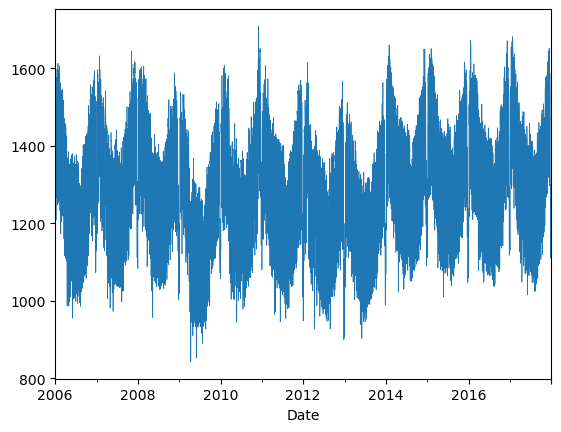

In [77]:
opsd_daily['Consumption'].plot(linewidth=0.5);

mari kita plot data sebagai titik-titik, dan lihat juga time series dari Matahari dan Angin

<AxesSubplot:xlabel='Date'>

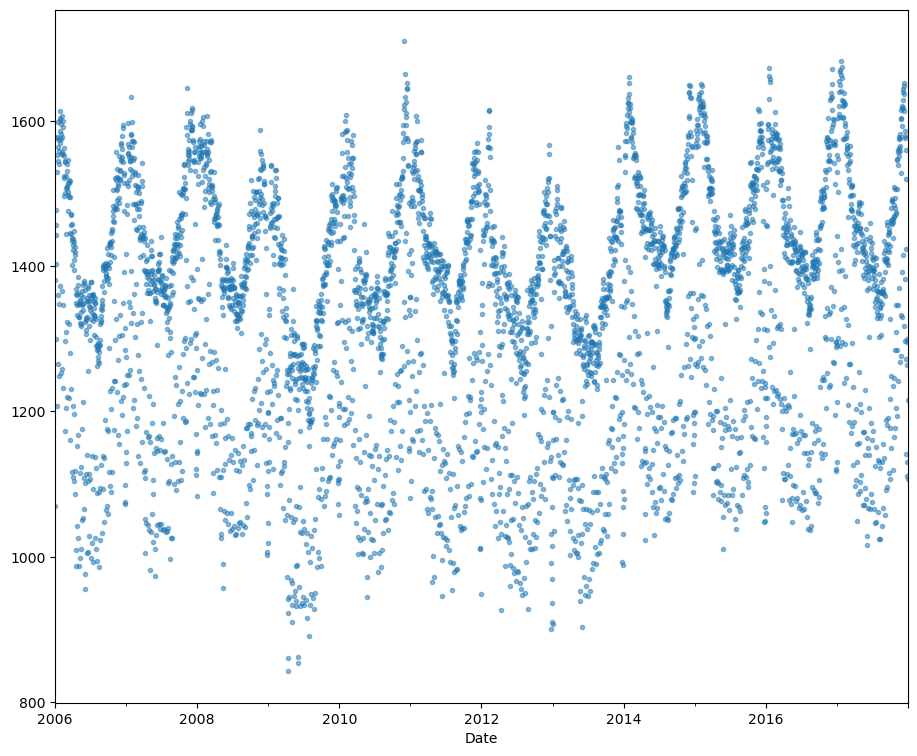

In [78]:
opsd_daily['Consumption'].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11,9))

<AxesSubplot:xlabel='Date'>

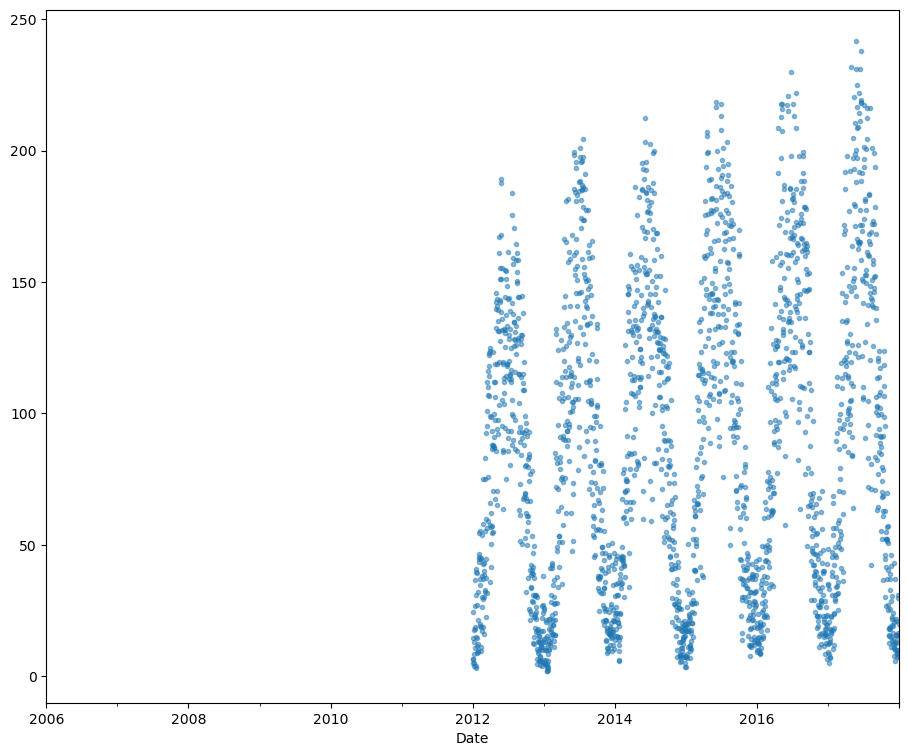

In [79]:
opsd_daily['Solar'].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9))

<AxesSubplot:xlabel='Date'>

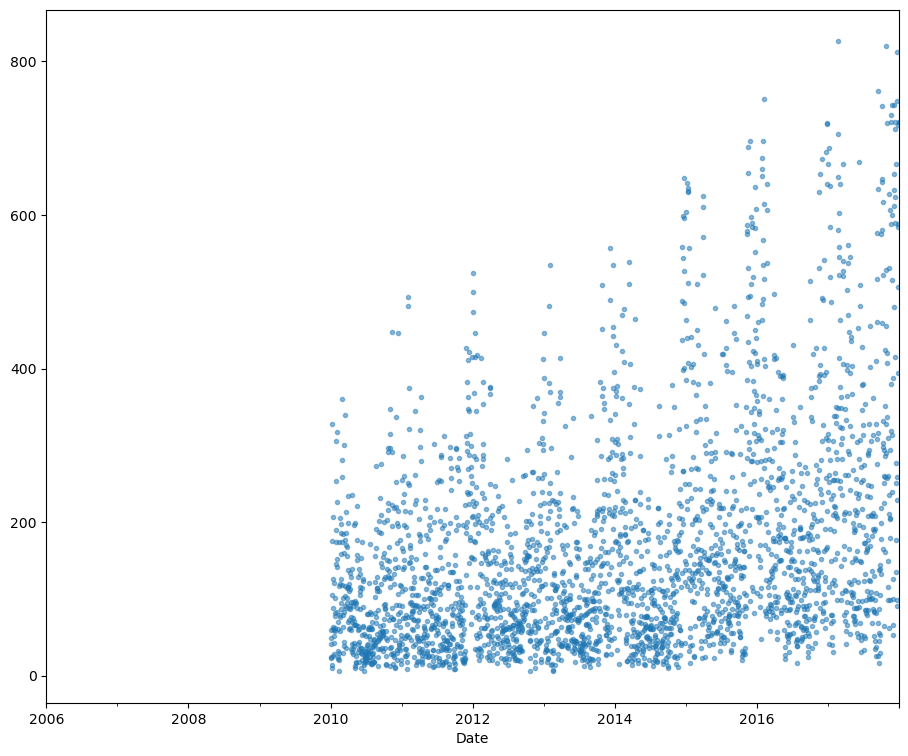

In [80]:
opsd_daily['Wind'].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9))

1. konsumsi listrik tertinggi ada dimusim dingin, kemungkinan karena pemanas listrik dan peningkatan pengguna penerangan, dan terendah di musim panas
2. produksi tenaga surya paling tinggi dimusim panas, saat sinar matahari paling melimpah, dan paling rendah dimusim dingin
3. produksi tenaga angin paling tinggi dimusim dingin, mungkin karena angin yg lebih kuat dan badai yg lebih sering, dan paling rendah di musim panas
4. tampaknya ada tren peningkatan yg kuat dalam produksi tenaga angin selama bertahun tahun

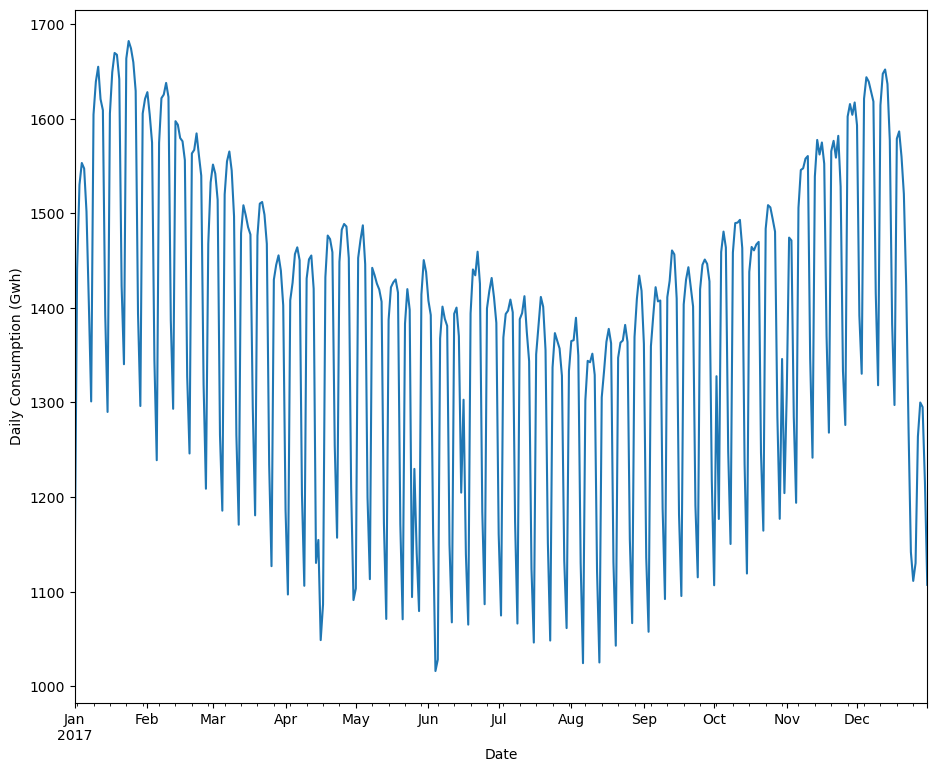

In [81]:
ax = opsd_daily.loc['2017', 'Consumption'].plot(figsize=(11, 9))
ax.set_ylabel('Daily Consumption (Gwh)');

kita dapat dengan jelas melihat osilasi mingguan/weekly oscillations. ciri menarik lain yg terlihatpada tinggkat granulitas ini adalah penurunan drastis konsumsi listrik pada awal januari dan akhir desember, selama liburan.

mari kita perbesar lebih jauh dan lihat bulan januari dan februari saja

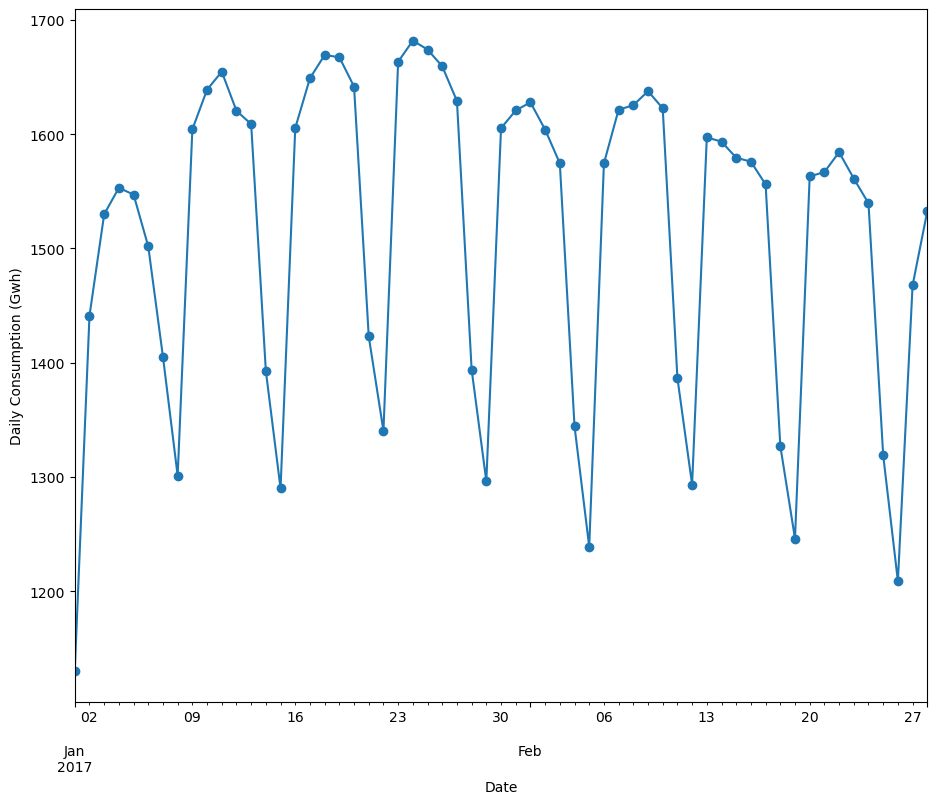

In [82]:
ax = opsd_daily.loc['2017-01' : '2017-02', 'Consumption'].plot(marker='o', linestyle='-', figsize=(11, 9))
ax.set_ylabel('Daily Consumption (Gwh)');

jelajahi lebih jauh seasonality data dengan fungsi box plots untuk mengelompokkan data berdasarkan periode waktu yg berbeda dan menampilkan distribusi untuk setiap kelompok.

pertama kita mengelompokkan data berdasarkan bulan, untuk memvisualisasikan yearly seasonality

<AxesSubplot:title={'center':'Consumption'}, xlabel='Month'>

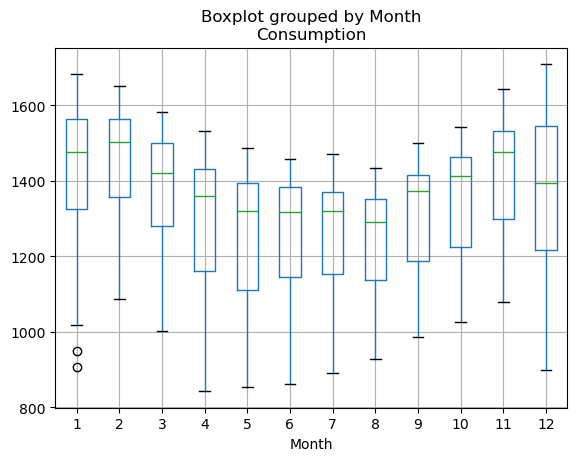

In [83]:
opsd_daily.boxplot(column=['Consumption'], by='Month')

<AxesSubplot:title={'center':'Solar'}, xlabel='Month'>

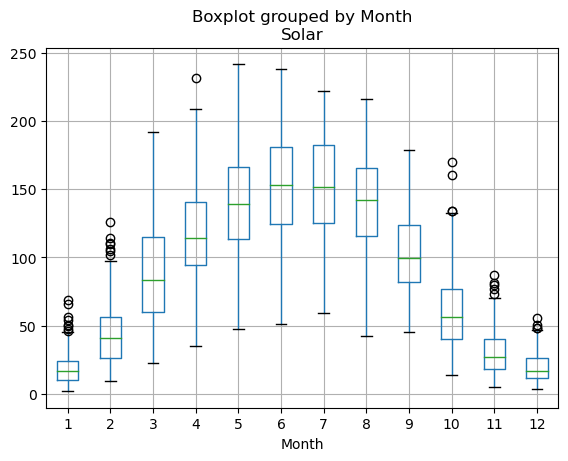

In [84]:
opsd_daily.boxplot(column=['Solar'], by='Month')

<AxesSubplot:title={'center':'Wind'}, xlabel='Month'>

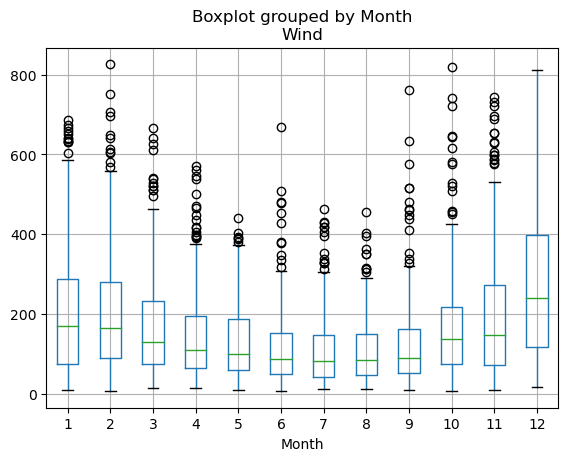

In [85]:
opsd_daily.boxplot(column=['Wind'], by='Month')

1. meskipun konsumsi listrik umumnya lebih tinggi di musim dingin dan lebih rendah dimusim panas, median dan dua kartil lebih rendah lebih rendah pada bulan desember dan januari diibandingkan dengan november dan februari, kemungkinan karena bisnis tutup selama liburan. kita melihat ini dalam rangkaian waktu untuk tahun 2017 dan boxplot menegaskan bahwa ini adalah pola yg konsisten selama bertahun tahun
2. sementara produksi tenaga surya dan angin sama sama menungjukkan yearly seasonality, distribusi tenaga angin memiliki banyak outliers, yang mencerminkan efek kecepatan angin ekstrem sesekali yg terkait dengan badai dan kondisi cuaca sementara lainnya.

mari kelompokkan rangkaian waktu konsumsi listrik berdasarkan hari dalam seminggu, untuk menjelajahi weekly seasonality

<AxesSubplot:title={'center':'Consumption'}, xlabel='Weekday'>

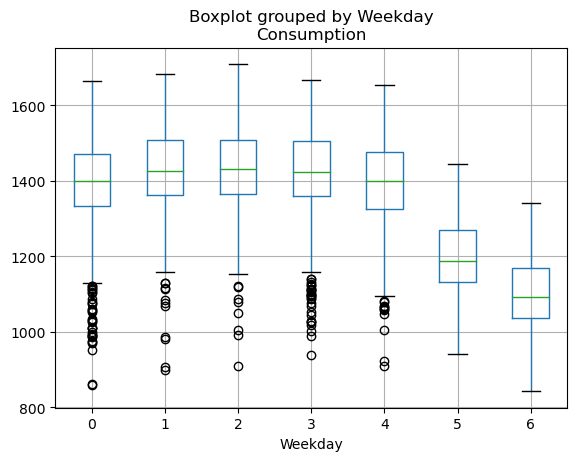

In [86]:
opsd_daily.boxplot(column=['Consumption'], by='Weekday')

seeprti yg diharapkan, konsumsi listrik secara signifikan lebih tinggi pada hari kerja

mari kita resample data menjadi weekly mean timeseries

In [87]:
data_columns = ['Consumption', 'Wind', 'Solar', 'Wind+Solar']
opsd_weekly_mean = opsd_daily[data_columns].resample('W').mean()
opsd_weekly_mean.head(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184000,NaN,NaN,NaN
2006-01-08,1381.300143,NaN,NaN,NaN
2006-01-15,1486.730286,NaN,NaN,NaN


Berdasarkan konstruksi, deret waktu mingguan kita memiliki 1/7 poin data sebanyak deret waktu harian. kita dapat mengonfirmasi ini dengan membandingkan jumlah baris dari dua DataFrame

In [88]:
print(opsd_daily.shape[0])
print(opsd_weekly_mean.shape[0])

4383
627


mari kita gambarkan rangkaian waktu Solar harian dan mingguan dalam satu periode enam bulan untuk membandingkannya

<AxesSubplot:xlabel='Date'>

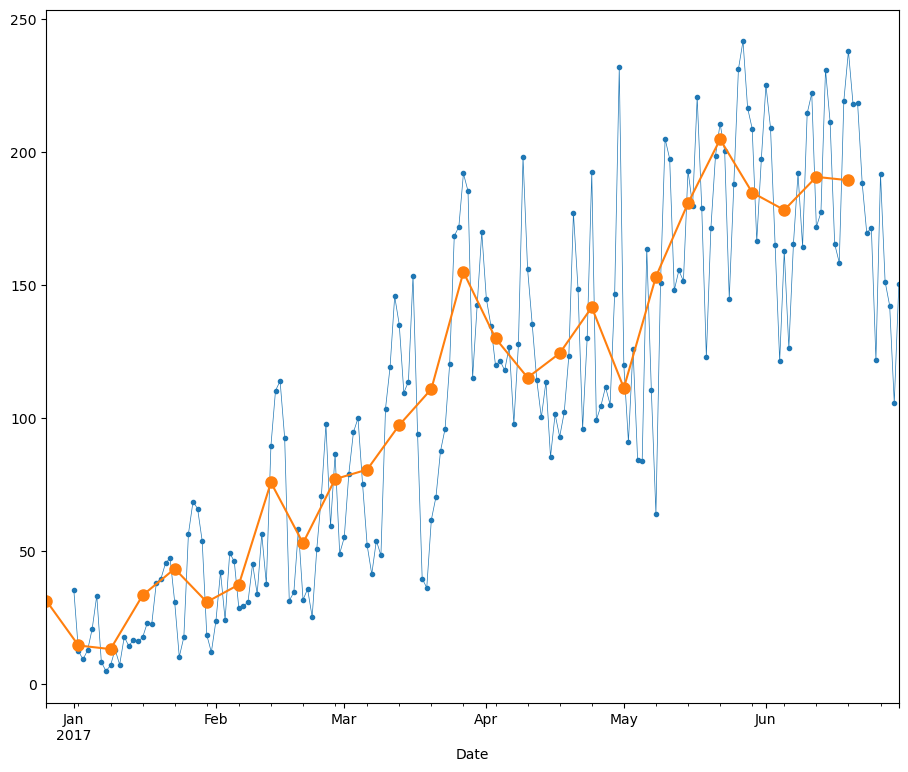

In [90]:
start, end  = '2017-01','2017-06'

opsd_daily.loc[start:end, 'Solar'].plot(marker='.', linestyle='-', linewidth=0.5, figsize=(11, 9))
opsd_weekly_mean.loc[start:end, 'Solar'].plot(marker='o', markersize=8, linestyle='-', figsize=(11, 9))

kita dapat melihat bahwa deret waktu rata rata mingguan lebih halus daripada deret waktu harian karena variabilitas frekuensi yg lebih tinggi telah dirata ratakan dalam resampling